# Computer Homework #9: Integrating the Biot-Savart Law

### Due at the beginning of class on 11/8/18


The <b>Biot-Savart Law</b> describes how currents produce magnetic fields: 
$$
       \mathbf{B}(\vec{r}) = \frac{\mu_0}{4\pi}\int\frac{I\,d\vec{\ell}\times ({\vec{r}-\vec{r}^{\prime})}}{|r-r^\prime|^3}
$$
In this expression, $\vec{r}$ is a field point, and the integral runs over all the currents, whose positions are labeled by the vector $\vec{r}^\prime$. The field point $\vec{r}$ is fixed for a particular integration. In general, this integral is difficult to evaluate analytically. This is why most introductory courses on E&M typically restrict their attention to examples like infinite straight wires, or the axis of symmetry of a loop. Fortunately, computers have no such limitations, and neither do we.

The Biot-Savart Law bears a strong mathematical resemblance to Coulomb's Law. Consequently, our numerical approach to integrating it is also similar. You may want to review Computer Homework #3 to refresh your memory about electric field calculations. 

In this assignment, we'll illustrate the numerical integration of the Biot-Savart Law by applying it to the above two cases where we already know the answer. Then we'll explore some more complicated scenarios.

In [1]:
# Import the usual libraries
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

## Example 1: B-field of a long, straight wire

This example will illustrate the approach that we'll follow for the rest of this assignment. First, we define a spatial grid of field points at which we will evaluate $B$. Next, we define the current that will be the source of this field. Finally, we'll perform the integration and make some plots.

Here, we will let the "infinite" wire run from $-5$ to $+5$ along the $x$-axis. We will compute the field in the $y$-$z$ plane, perpendicular to the wire at $x=0$. In this example, $y$ and $z$ run between $-4$ and $+4$. I encourage you to play around with these numbers.

In [2]:
# Define our spatial grid
coord_min, coord_max = -4, 4       
Ngrid = 200    # dimension of each spatial axis
extent = np.linspace(coord_min, coord_max, Ngrid)
y, z = np.meshgrid(extent, extent)
field_shape = y.shape 
# The ravel() function "flattens" a 2d array into a single big 1d array. 
# You can think of it as laying all the rows side-by-side. This makes it easier
# to loop over all the field points using a single index.
yfield = np.ravel(y) 
zfield = np.ravel(z)
Npoints = np.size(yfield)    # total number of field points (=Ngrid*Ngrid)

In [3]:
# define a line of current. This goes from -5 to 5 along the x-axis
dx = 0.1
xwire = np.arange(-5,5,dx)
ywire = np.zeros(len(xwire))
zwire = np.zeros(len(xwire))

# Pick simple values for the constant mu_0 and the current.
mu_0 = 1
I = 1

In [4]:
# Calculate the field in the y-z plane at x=0

# These arrays will hold the components of B at each field point. Initialize them to zero.
B_x = np.zeros(Npoints)
B_y = np.zeros(Npoints)
B_z = np.zeros(Npoints)

index = np.arange(Npoints)  # create an index over field points 
for i in index:   # loop over field points in our meshgrid and calculate B at each point
    dB_x = 0
    dB_y = 0
    dB_z = 0
    x_sep = 0 - xwire    # we are evaluating B in the y-z plane, where x=0
    y_sep = yfield[i] - ywire
    z_sep = zfield[i] - zwire
    r_sep = np.sqrt(x_sep**2 + y_sep**2 + z_sep**2)
    r_hat = np.array([x_sep, y_sep, z_sep])/r_sep
    dl = np.array([dx,0,0])           # vector element of length along the wire
    dl_cross_rhat = np.cross(dl, r_hat, axisb=0)    # np.cross() does just what you think
    # arrays of components of B at this field point:
    dB_x += mu_0/(4*np.pi)*I*dl_cross_rhat[:,0]/r_sep**2
    dB_y += mu_0/(4*np.pi)*I*dl_cross_rhat[:,1]/r_sep**2
    dB_z += mu_0/(4*np.pi)*I*dl_cross_rhat[:,2]/r_sep**2
    # Do the Biot-Savart integral by summing all the dB's. It's this easy!
    # The integrals give us the components of B at the ith field point. 
    B_x[i] = np.sum(dB_x)     
    B_y[i] = np.sum(dB_y)
    B_z[i] = np.sum(dB_z)
    
# Now that we've exited the loop, unflatten the B-field arrays so that they have the same shape as our meshgrid
B_x = B_x.reshape(field_shape)
B_y = B_y.reshape(field_shape)
B_z = B_z.reshape(field_shape)

magB = np.sqrt(B_x**2 + B_y**2 + B_z**2)

Text(0,0.5,'z')

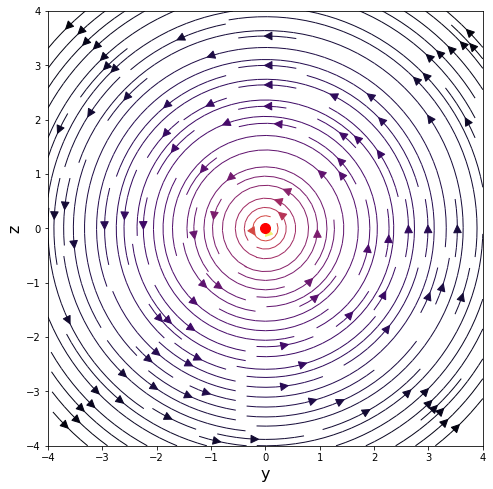

In [5]:
# Make some plots
fig, ax1 = plt.subplots(1, figsize=(8,8))
color = 2 * np.log(magB)    # colors the arrows based on field strength
ax1.streamplot(y, z, B_y, B_z, color=color, linewidth=1, cmap=plt.cm.inferno,
              density=1.5, arrowstyle='simple', arrowsize=1.5)
ax1.plot(0,0,'o', markersize=10, color='r')   # indicate the location of the wire

ax1.set_aspect('equal')
ax1.set_xlim([coord_min,coord_max])
ax1.set_ylim([coord_min,coord_max])
ax1.set_xlabel('y', fontsize=16)
ax1.set_ylabel('z', fontsize=16)

We can also visualize the field strength in one dimension by plotting B as a function of the radial distance from the wire. We also compare the the analytical result from Ampere's Law.

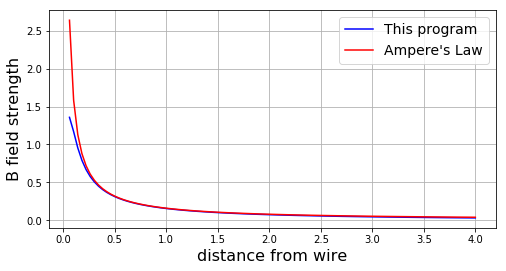

In [6]:
# Make a plot of the field strength as a function of radial distance from the wire. 
# Do this by going along the positive y-axis for z=0
fix, ax = plt.subplots(1, figsize=(8,4))
mid = int(Ngrid/2)+1   # add 1 to avoid starting too close to the wire
pos_yaxis = y[mid,mid:]
Baxis = B_z[mid,mid:]      # along the y-axis, B points in the z-direction, so use this component.
ax.plot(pos_yaxis, Baxis, color='b', label='This program')
B_ampere = 1/(2*np.pi*pos_yaxis)
ax.plot(pos_yaxis, B_ampere, color='r', label='Ampere\'s Law')
ax.set_xlabel('distance from wire', fontsize=16)
ax.set_ylabel('B field strength', fontsize=16)
ax.legend(fontsize=14)
ax.grid()

You can try changing the code above to plot the other components of $B$ and verify that they are small.

## Example 2: B-field of a current loop


The next step up in complexity is the field of a current loop. It's possible to obtain an analytic solution along the axis of symmetry, but for a computer it's no additional trouble to get the field everywhere else. 

Our loop will be centered at the origin, and will be located in the $x$-$z$ plane. It will have a radius $R=1$, and carry a current of 1 A.

As before, we'll compute the field on a grid of points in the $y$-$z$ plane at $x=0$. So the loop is perpendicular to your screen... imagine half of the loop sticking out of the plane of your screen.

This integration is a little more complex than the straight wire because the direction of the current is not constant. We handle this by breaking the loop up into a finite number of segments, each with its own location and direction.



In [7]:
# define a loop of current. This is centered at the origin, has radius 1, and is in the x-z plane
R=1
nstep = 10      # number of segments to divide the loop into (code gets very slow if this is too big)
phi = np.linspace(0, 2*np.pi, nstep)
xloop = R*np.cos(phi)
yloop = np.zeros(nstep)
zloop = R*np.sin(phi)

ds = 2*np.pi*R/nstep   # element of arc length

In [8]:
# Define our spatial grid
coord_min, coord_max = -4, 4
Ngrid = 100
extent = np.linspace(coord_min, coord_max, Ngrid)
y, z = np.meshgrid(extent, extent)
field_shape = y.shape
yfield = np.ravel(y)
zfield = np.ravel(z)
Npoints = np.size(yfield)

B_x = np.zeros(Npoints)
B_y = np.zeros(Npoints)
B_z = np.zeros(Npoints)

index = np.arange(Npoints)

for i in index:   # loop over field points in our meshgrid and calculate B at each point
    if i%1000==0: print('Field point: ',i)   # to monitor progress
    dB_x = 0
    dB_y = 0
    dB_z = 0
    for j in np.arange(nstep):    # loop over segments in our loop
        x_sep = 0 - xloop[j]      # we are evaluating B in the y-z plane where x=0
        y_sep = yfield[i] - yloop[j]
        z_sep = zfield[i] - zloop[j]
        r_sep = np.sqrt(x_sep**2 + y_sep**2 + z_sep**2)
        r_hat = np.array([x_sep, y_sep, z_sep])/r_sep
        dl = ds*np.array([np.sin(phi[j]),0,-np.cos(phi[j])])    # vector describing this segment of the loop
        dl_cross_rhat = np.cross(dl, r_hat)
        dB_x += mu_0/(4*np.pi)*I*dl_cross_rhat[0]/r_sep**2
        dB_y += mu_0/(4*np.pi)*I*dl_cross_rhat[1]/r_sep**2
        dB_z += mu_0/(4*np.pi)*I*dl_cross_rhat[2]/r_sep**2
    B_x[i] = np.sum(dB_x)     # do the Biot-Savart integral by summing all the dB's.
    B_y[i] = np.sum(dB_y)
    B_z[i] = np.sum(dB_z)

# Now that we've exited the loop, unflatten the B-field arrays so that they have the same shape as our meshgrid
B_x = B_x.reshape(field_shape)
B_y = B_y.reshape(field_shape)
B_z = B_z.reshape(field_shape)
magB = np.sqrt(B_x**2 + B_y**2 + B_z**2)

Field point:  0
Field point:  1000
Field point:  2000
Field point:  3000
Field point:  4000
Field point:  5000
Field point:  6000
Field point:  7000
Field point:  8000
Field point:  9000


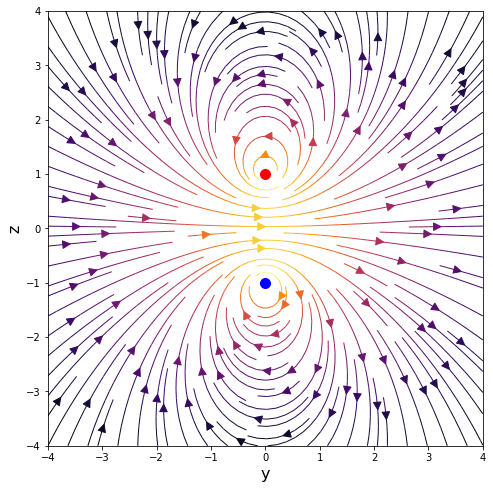

In [9]:
fig, ax1 = plt.subplots(1, figsize=(8,8))
color = 2 * np.log(magB)    # colors the arrows based on field strength
ax1.streamplot(y, z, B_y, B_z, color=color, linewidth=1, cmap=plt.cm.inferno,
              density=1.5, arrowstyle='simple', arrowsize=1.5)
ax1.plot(0,1,'o', markersize=10, color='r')   # indicate where the loop sticks in and out
ax1.plot(0,-1,'o', markersize=10, color='b')   # indicate where the loop sticks in and out
ax1.set_aspect('equal')
ax1.set_xlim([coord_min,coord_max])
ax1.set_ylim([coord_min,coord_max])
ax1.set_xlabel('y', fontsize=16)
lab = ax1.set_ylabel('z', fontsize=16)

In [10]:
# This is the exact solution along the axis of symmetry
def B_loop(z, I=1, R=1):
    return mu_0*I/2*R**2/(R**2 + z**2)**(3/2)

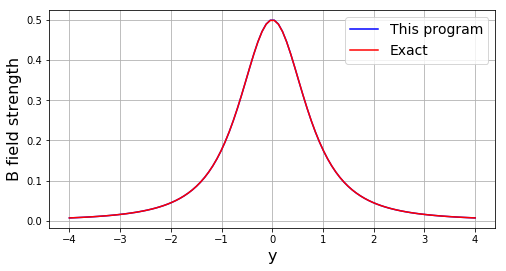

In [11]:
# Make a plot of the field strength along the y-axis at z=0
# Compare to the exact result
fix, ax = plt.subplots(1, figsize=(8,4))
mid = int(Ngrid/2)
yaxis = y[mid,:]
Baxis = B_y[mid,:]      # along the y-axis, B points in the y-direction, so use this component.
ax.plot(yaxis, Baxis, color='b', label='This program')
ax.plot(yaxis, B_loop(yaxis), color='r', label='Exact')
ax.set_xlabel('y', fontsize=16)
ax.set_ylabel('B field strength', fontsize=16)
ax.legend(fontsize=14)
ax.grid()

You can also try plotting the other components to verify that they are small.

***
## Your assignment

## Part 1 (10 points): B-field of two parallel wires

Modify the code in <b>Example 1</b> to calculate the B-field for two parallel wires. The wires should run parallel to the $x$-axis at $z=0$ and $y=\pm 1$.

a. Make a 2D plot of the field when the currents are in the same direction.

b. Make a 2D plot of the field when the currents are in opposite directions.


In [ ]:
# Your code goes here.

## Part 2 (10 points): B-field of two parallel loops

Modify the code in <b>Example 2</b> to calculate the $B$-field for two parallel loops carrying current in the same direction. The loops should be in the $x$-$z$ plane at $y=\pm 1$.

a. Make a 2D plot of the field.

b. Plot the field strength along the axis of symmetry.

In [ ]:
# Your code goes here.

## Part 3 (10 points): Helmholtz Coils (analytic version)

<b> Helmholtz coils</b> are a way of arranging two parallel loops to produce a relatively uniform magnetic field. In the lab, you use a set of Helmholtz coils that look like this:

<img src="http://www-personal.umich.edu/~gerdes/img/Set-up_5H30.20_bmp.jpg">

Using the principle of superposition, write down an expression for $B(z)$ for two parallel circular loops with radius $R$, separated by a distance $a$. Find the value of $a$ that minimizes the non-uniformity of $B(z)$ near the midpoint between the two coils. This means that you are looking for the value of $a$ that makes 
$$
        \left.\frac{d^2B}{dz^2}\right|_{z=0} = 0.
$$
(Because $B(z)$ is a symmetric function of $z$, this means that the first nonzero derivative of $B$ is $d^4B/dz^4$.)

Show your work in any of several ways:
* In LaTeX in a markdown cell in this notebook
* Using a symbolic manipulation package like Mathematica or Matlab (turn in your work as part of this submission)
* Learn about the <a href="https://docs.sympy.org/latest/index.html">sympy</a> package and show your calculation here.
* Turn in a written calculation in class by the due date for this assignment.

## Part 4 (10 points): Helmholtz Coils (numerical version)

* Modify your code from Part 2 to place the coils at the spacing you calculated in Part 3.
* Make a plot of $B(z)$ along the axis of symmetry. To better highlight the region of interest, make the limits of your plot be $-2<y<2$. This will illustrate the uniformity of the field along the axis. Approximately what is the ratio of $B(z)$ at the center of one coil to its value at the midpoint between the coils? 
* Make a plot of $B(z)$ as a function of radial distance from the center in the midplane between the two coils. This will illustrate the uniformity of the field in the transverse direction. It's extremely difficult to do this calculation analytically. Approximately what is the ratio of $B(z)$ at $r=R$ to its value at $r=0$?

In [ ]:
# Your code and discussion goes here.